<a href="https://colab.research.google.com/github/SodisettiRakesh123/cognifyz/blob/main/Task1_cogi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!unzip -o "/content/archive (13).zip"

Archive:  /content/archive (13).zip
  inflating: zomato.csv              


Shape: (51717, 17)
                                                 url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes 

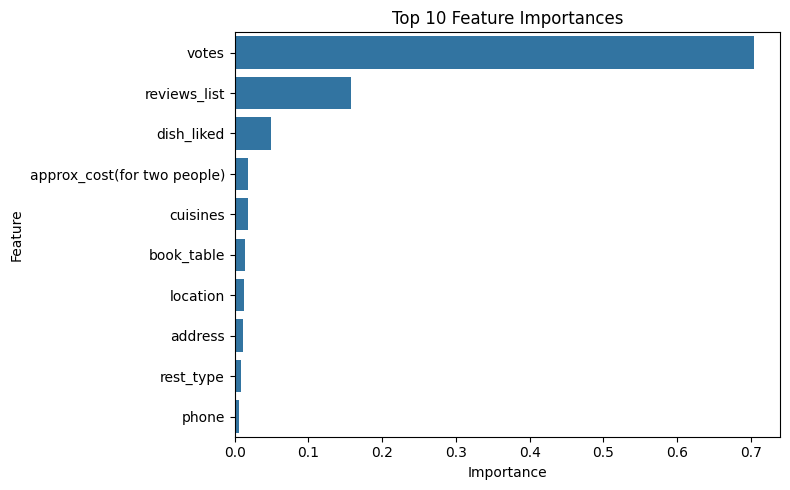

In [10]:
# 1. Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load data
df = pd.read_csv("zomato.csv")
print("Shape:", df.shape)
print(df.head())
print(df.isnull().sum())

# Print column names to identify the correct target column
print("\nColumn names:")
print(df.columns)


# 3. Preprocessing
# Clean 'rate' column
df['rate'] = df['rate'].astype(str).str.replace('/5', '').str.strip()
df['rate'] = pd.to_numeric(df['rate'], errors='coerce')


for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(df[col].median())

for col in df.select_dtypes(include=[object]).columns:
    df[col] = df[col].astype(str)
    df[col] = LabelEncoder().fit_transform(df[col])

target = "rate"  # adjust if column name differs
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 4. Train Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42, max_depth=6)
model.fit(X_train, y_train)

# 5. Evaluate
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

# 6. Feature Importance
fi = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values("Importance", ascending=False)

print(fi.head(10))

# 7. Visualize
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=fi.head(10))
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

In [12]:
# Display the feature importances DataFrame
display(fi)

# You can also access specific information about the feature importances
print("\nTop 5 most important features:")
display(fi.head())

,Feature,Importance
5,votes,7.043543e-01
12,reviews_list,1.575166e-01
9,dish_liked,4.862300e-02
11,approx_cost(for two people),1.866270e-02
10,cuisines,1.831240e-02
4,book_table,1.387268e-02
7,location,1.210035e-02
1,address,1.116618e-02
8,rest_type,8.480251e-03
6,phone,6.077576e-03



Top 5 most important features:


,Feature,Importance
5,votes,0.704354
12,reviews_list,0.157517
9,dish_liked,0.048623
11,approx_cost(for two people),0.018663
10,cuisines,0.018312


In [14]:
# Compare the evaluation metrics of the two models

print("Decision Tree Regressor Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

print("\nRandom Forest Regressor Evaluation:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Decision Tree Regressor Evaluation:
MSE: 0.07352730804959026
R²: 0.5287352639107115

Random Forest Regressor Evaluation:
MSE: 0.06837265208565133
R²: 0.561773432271756
